<a target="_blank" href="https://colab.research.google.com/github/sonder-art/fdd_p25/blob/main/professor/numpy/notebooks/tarea_tiempos_numpy.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


### El proyecto se entrega en un pull-request en este documento directamente, que no sea del main branch sino de un branch llamado `proyecto_python`, y el titulo de pull reques `Proyecto Python`, se entrega antes del 6 de noviembre.

# Tarea/Proyecto — Tiempos con distintas estrategias (Python vs NumPy)

Objetivo: practicar varias formas de programar en Python y comparar su rendimiento con NumPy.

Qué harás:
- Implementar 3 problemas (P1 sencillo, P2 intermedio, P3 un poco más complejo).
- Para cada problema, crear 4 versiones: for, list comprehension, generator (yield/generador), y NumPy vectorizado.
- Medir tiempos con `timeit` de forma justa y compararlos.

Reglas mínimas:
- Verifica primero que todas las versiones producen el mismo resultado lógico (mismo tamaño/forma, mismos valores o valores equivalentes).
- Sé consistente: no mezcles listas y arreglos sin aclarar el formato final esperado.
- Para medir generadores, materializa con `list(...)` en el cronómetro para compararlo con las otras estrategias.
- No copies soluciones externas; escribe tu implementación.

Referencia: `07_Vectorizacion_vs_For_vs_Comprehensions.ipynb`.



In [2]:
# Instalación rápida (si la necesitas)

import numpy as np
import timeit


## Problema 1 — Escalar un vector por una constante

Descripción: dado un arreglo 1D `a` y una constante escalar `c`, produce una salida equivalente a `a * c`.

Requisitos:
- Entrada: `a` (1D), `c` (float/int).
- Salida: misma longitud que `a`, valores escalados por `c`.
- Mantén el tipo de salida consistente entre versiones (lista vs ndarray), o documenta la diferencia.

Implementa 4 versiones:
- for loop (acumula resultados con append)
- list comprehension
- generator (yield o expresión generadora)
- NumPy vectorizado

Datos sugeridos: `a = np.arange(n, dtype=float)`, `c = 2.0`.


In [3]:
# P1 — Stubs (completa las funciones)

def p1_for(a: np.ndarray, c: float):
    """Devuelve a*c usando for y append."""
    resp=[]
    for u in a:
        resp.append(u*c)
    return resp


def p1_comp(a: np.ndarray, c: float):
    """Devuelve a*c usando list comprehension."""
    return [u*c for u in a]


def p1_gen(a: np.ndarray, c: float):
    """Devuelve (como generador) a*c usando yield o gen expr."""
    for u in a:
        yield u*c


def p1_np(a: np.ndarray, c: float):
    """Devuelve a*c usando NumPy vectorizado."""
    return a*c


In [4]:
# P1 — Harness de tiempos (ajusta n y number)

def time_p1(n=100_000, number=5):
    a = np.arange(n, dtype=float)
    c = 2.0
    return (
        timeit.timeit(lambda: p1_for(a, c), number=number),
        timeit.timeit(lambda: p1_comp(a, c), number=number),
        timeit.timeit(lambda: list(p1_gen(a, c)), number=number),
        timeit.timeit(lambda: p1_np(a, c), number=number),
    )

time_p1() 


(0.15105613300147525,
 0.09758662399872264,
 0.1855213429989817,
 0.0004134699993301183)

## Problema 2 — Suma de vecinos 1D (ventana)

Descripción: dado `a` (1D) y una ventana `k` impar (p. ej. 3), calcular `b[i]` como la suma de los `k` vecinos centrados en `i`.

Requisitos:
- Entrada: `a` (1D), `k` impar ≥ 3.
- Borde: puedes ignorar índices fuera de rango, recortar el resultado o replicar/extender bordes; explica tu elección.
- Salida: 1D; documenta si su longitud cambia por tu manejo de bordes.

Implementa 4 versiones: for, list comprehension, generator, NumPy vectorizado (pistas: slicing con desplazamientos, `np.roll`, o una convolución simple).

Datos sugeridos: `a = np.arange(n, dtype=float)`, `k = 3`. 


In [5]:
# P2 — Stubs (completa las funciones)

def p2_for(a: np.ndarray, k: int = 3):
    """Devuelve suma de vecinos (1D) con for. Manejo de bordes a tu elección."""
    z=k//2
    p=np.pad(a,(z,z), mode="edge")
    n=a.shape[0]
    resp=[]
    for i in range(n):
        s=0.0
        for u in range(k):
            s+=p[i+u]
        resp.append(s)
    return resp


def p2_comp(a: np.ndarray, k: int = 3):
    """List comprehension."""
    z=k//2
    p=np.pad(a,(z,z), mode="edge")
    n=a.shape[0]
    return [float(sum(p[i:i+k])) for i in range(n)]


def p2_gen(a: np.ndarray, k: int = 3):
    """Generator (yield o gen expr)."""
    z=k//2
    p=np.pad(a,(z,z), mode="edge")
    n=a.shape[0]
    for i in range(n):
        yield float(sum(p[i:i+k]))
    

def p2_np(a: np.ndarray, k: int = 3):
    """NumPy vectorizado (slicing/roll/convolución simple)."""
    z=k//2
    p=np.pad(a,(z,z), mode="edge")
    n=a.shape[0]
    st=np.stack([p[j:j+n]for j in range(k)], axis=0)
    return st.sum(axis=0)


In [6]:
# P2 — Harness de tiempos

def time_p2(n=100_000, number=3):
    a = np.arange(n, dtype=float)
    k = 3
    return (
        timeit.timeit(lambda: p2_for(a, k), number=number),
        timeit.timeit(lambda: p2_comp(a, k), number=number),
        timeit.timeit(lambda: list(p2_gen(a, k)), number=number),
        timeit.timeit(lambda: p2_np(a, k), number=number),
    )

time_p2()  # descomenta para probar


(0.4783837590002804,
 0.5539442890003556,
 0.6601247939997847,
 0.005384896001487505)

## Problema 3 — Transformación no lineal y filtrado

Descripción: dado `a` (1D float), aplica una transformación no lineal y filtra con un umbral.

Requisitos:
- Transformación propuesta (de ejemplo): `np.sin(a) + a**2`.
- Entrada: `a` (1D float), `umbral` (float).
- Salida: colección con los elementos resultantes que superan `umbral`.
- Mantén clara la diferencia entre devolver lista vs ndarray.

Implementa 4 versiones: for, list comprehension, generator, NumPy vectorizado (ufuncs + máscara booleana).

Datos sugeridos: `a = np.linspace(0, 1000, n)`, `umbral = 10.0`. 


In [7]:
# P3 — Stubs (completa las funciones)
from typing import Generator, List

def p3_for(a: np.ndarray, umbral: float):
    """Filtra tras transformación no lineal con for."""
    resp: List[float]=[]
    for u in a:
        v=np.sin(u) + u**2
        if v>umbral:
            resp.append(float(v))
    return resp

def p3_comp(a: np.ndarray, umbral: float):
    """List comprehension."""
    return [float(np.sin(u) + u**2) for u in a if (np.sin(u) + u**2) > umbral]


def p3_gen(a: np.ndarray, umbral: float):
    """Generator (yield o gen expr)."""
    for u in a:
        v=np.sin(u) + u**2
        if v > umbral:
            yield float(v)


def p3_np(a: np.ndarray, umbral: float):
    """NumPy vectorizado (ufuncs + máscara booleana)."""
    v=np.sin(a) + a**2
    m = v>umbral
    return v[m]


In [8]:
# P3 — Harness de tiempos

def time_p3(n=200_000, number=3):
    a = np.linspace(0, 1000, n, dtype=float)
    umbral = 10.0
    return (
        timeit.timeit(lambda: p3_for(a, umbral), number=number),
        timeit.timeit(lambda: p3_comp(a, umbral), number=number),
        timeit.timeit(lambda: list(p3_gen(a, umbral)), number=number),
        timeit.timeit(lambda: p3_np(a, umbral), number=number),
    )

time_p3()  # descomenta para probar


(1.0252268929998536,
 1.4197992720000912,
 0.7821711340002366,
 0.012374996998914867)

## Guardar resultados de tiempos en JSON (guía)

Motivación: conservar resultados de experimentos para compararlos más tarde (en otra sesión/equipo), graficarlos o compartirlos. JSON es legible, portable y fácil de procesar.

### Esquema sugerido de datos

- Nivel 1: metadatos del experimento (fecha/hora, versión de Python/NumPy, host, parámetros globales como `n` y `number`).
- Nivel 2: problemas y variantes (p1/p2/p3 y estrategias: for/comp/gen/numpy) con sus tiempos agregados.
- Recomendación: guardar mediana y desviación o percentiles; también puedes guardar el vector de repeticiones si lo necesitas.

```json
{
  "metadata": {
    "timestamp": "2025-10-23T12:34:56Z",
    "python_version": "3.10.12",
    "numpy_version": "2.1.1",
    "machine": "x86_64",
    "params": { "n": 100000, "number": 5 }
  },
  "results": {
    "p1": {
      "for":    { "s_per_call_median": 0.0281, "repetitions": 5 },
      "comp":   { "s_per_call_median": 0.0250, "repetitions": 5 },
      "gen":    { "s_per_call_median": 0.0312, "repetitions": 5 },
      "numpy":  { "s_per_call_median": 0.0004, "repetitions": 5 }
    },
    "p2": { "for": { "s_per_call_median": 0.041 } },
    "p3": { "numpy": { "s_per_call_median": 0.003 } }
  }
}
```

Notas:
- Usa claves en minúsculas y sin espacios para facilitar procesamiento.
- Si guardas vectores de tiempos por repetición, usa una clave adicional (por ejemplo `raw_times: [ ... ]`).
- Si diferencias por tamaño `n`, crea múltiples entradas o anida por `n` (p. ej. `results_by_n: {"1e4": {...}, "1e5": {...}}`).

### Organización de archivos

- Carpeta: `results/tiempos/` dentro del mismo directorio del notebook.
- Nombre de archivo: incluir fecha, problema o tamaño (p. ej., `tiempos_p123_n1e5_2025-10-23.json`).
- Evita sobreescribir: si vuelves a correr, genera un nuevo archivo con timestamp.

### Buenas prácticas al medir y guardar

- Medir varias repeticiones por variante; guardar la mediana (y opcionalmente percentiles como p10/p90) para robustez.
- Registrar parámetros que afectan el resultado: `n`, `number`, dtype, política de bordes en P2, etc.
- Guardar seeds o condiciones de entorno si hay aleatoriedad.
- Validar que los resultados lógicos son equivalentes antes de medir (mismo output).
- No mezclar E/S dentro de la sección medida; la E/S sesga los tiempos.

### Uso posterior

- Leer los JSON y comparar versiones/estrategias; graficar con `matplotlib`/`seaborn`.
- Automatizar reportes que lean todos los archivos de `results/tiempos/` y generen tablas comparativas.
- Mantener un historial temporal para ver regresiones o mejoras de rendimiento.



In [11]:
import json
import numpy as np
import time
import platform
import datetime
from pathlib import Path
import pandas as pd
import glob


In [15]:
n = 100_000      # tamaño de datos
number = 5       # repeticiones por medición de timeit
reps_externo = 7 # repeticiones externas para calcular mediana robusta
variant_names = ("for", "comp", "gen", "numpy")

def medir_con_estadisticas(func, *args, **kwargs):
    """
    Ejecuta `func` reps_externo veces. `func` debe devolver una tupla de tiempos
    (una entrada por variante). Regresa un dict: {variante: {median, p10, p90, raw_times}}
    """
    # times shape: (reps_externo, n_variants)
    times = np.array([func(*args, **kwargs) for _ in range(reps_externo)], dtype=float)

    stats = {}
    for i, name in enumerate(variant_names):
        col = times[:, i]
        stats[name] = {
            "median": float(np.median(col)),
            "p10": float(np.percentile(col, 10)),
            "p90": float(np.percentile(col, 90)),
            "raw_times": col.tolist(),
        }
    return stats

# ---- Medir P1, P2, P3
print("⏱ Midiendo P1...")
p1_stats = medir_con_estadisticas(time_p1, n=n, number=number)
print("⏱ Midiendo P2...")
p2_stats = medir_con_estadisticas(time_p2, n=n, number=number)
print("⏱ Midiendo P3...")
p3_stats = medir_con_estadisticas(time_p3, n=n, number=number)

# ---- Empaquetar JSON
meta = {
    "timestamp": datetime.datetime.now().isoformat(),
    "python_version": platform.python_version(),
    "numpy_version": np.__version__,
    "machine": platform.machine(),
    "params": {"n": n, "number": number, "reps_externo": reps_externo},
}

# Normalizo el esquema a: s_per_call_median/p10/p90 + repetitions
def _normalize(block):
    return {
        var: {
            "s_per_call_median": vals["median"],
            "p10": vals["p10"],
            "p90": vals["p90"],
            "repetitions": number,
        }
        for var, vals in block.items()
    }

data = {
    "metadata": meta,
    "results": {
        "p1": _normalize(p1_stats),
        "p2": _normalize(p2_stats),
        "p3": _normalize(p3_stats),
    },
}

# ---- Guardar
Path("results/tiempos").mkdir(parents=True, exist_ok=True)
fecha = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
nombre_archivo = f"results/tiempos/tiempos_p123_n{n}_{fecha}.json"

with open(nombre_archivo, "w") as f:
    json.dump(data, f, indent=4)

print(f"\n✅ Resultados guardados en: {nombre_archivo}")

# ---- Cargar todos los JSON y armar DataFrame largo
archivos = glob.glob("results/tiempos/*.json")

rows = []
for archivo in archivos:
    with open(archivo, "r") as f:
        d = json.load(f)

    ts = d["metadata"]["timestamp"]
    for problema, variantes in d["results"].items():  # p1, p2, p3
        for variante, vals in variantes.items():      # for, comp, gen, numpy
            rows.append({
                "timestamp": ts,
                "problema": problema,
                "variante": variante,
                "tiempo_median": vals.get("s_per_call_median"),
                "p10": vals.get("p10", np.nan),
                "p90": vals.get("p90", np.nan),
                "repeticiones_timeit": vals.get("repetitions"),
                "n": d["metadata"]["params"]["n"],
                "reps_externo": d["metadata"]["params"].get("reps_externo", np.nan),
            })

df = pd.DataFrame(rows)
print(df.head())

⏱ Midiendo P1...
⏱ Midiendo P2...
⏱ Midiendo P3...

✅ Resultados guardados en: results/tiempos/tiempos_p123_n100000_2025-11-05_12-10-06.json
                    timestamp problema variante  tiempo_median       p10  \
0  2025-11-05T12:07:51.307524       p1      for       0.101487  0.067465   
1  2025-11-05T12:07:51.307524       p1     comp       0.070272  0.064689   
2  2025-11-05T12:07:51.307524       p1      gen       0.080565  0.076466   
3  2025-11-05T12:07:51.307524       p1    numpy       0.000510  0.000439   
4  2025-11-05T12:07:51.307524       p2      for       0.465902  0.447146   

        p90  repeticiones_timeit       n  reps_externo  
0  0.134906                    5  100000           7.0  
1  0.155428                    5  100000           7.0  
2  0.143769                    5  100000           7.0  
3  0.000601                    5  100000           7.0  
4  0.530087                    5  100000           7.0  


In [21]:
import json
import glob
import pandas as pd

# Leer todos los JSON
archivos = glob.glob("results/tiempos/*.json")

data = []
for archivo in archivos:
    with open(archivo, "r") as f:
        data.append(json.load(f))

# Convertirlos a DataFrame
filas = []
for d in data:
    meta = d.get("metadata", {})
    params = meta.get("params", {})
    timestamp = meta.get("timestamp", "")
    
    for problema, variantes in d.get("results", {}).items():
        for variante, valores in variantes.items():
            filas.append({
                "timestamp": timestamp,
                "problema": problema,
                "variante": variante,
                "tiempo_median": valores.get("s_per_call_median", np.nan),
                "p10": valores.get("p10", np.nan),
                "p90": valores.get("p90", np.nan),
                "repeticiones_timeit": valores.get("repetitions", np.nan),
                "n": params.get("n", np.nan),
                "reps_externo": params.get("reps_externo", np.nan),
            })


df = pd.DataFrame(filas)
df

,timestamp,problema,variante,tiempo_median,p10,p90,repeticiones_timeit,n,reps_externo
0,2025-11-05T12:07:51.307524,p1,for,0.101487,0.067465,0.134906,5,100000,7.0
1,2025-11-05T12:07:51.307524,p1,comp,0.070272,0.064689,0.155428,5,100000,7.0
2,2025-11-05T12:07:51.307524,p1,gen,0.080565,0.076466,0.143769,5,100000,7.0
3,2025-11-05T12:07:51.307524,p1,numpy,0.000510,0.000439,0.000601,5,100000,7.0
4,2025-11-05T12:07:51.307524,p2,for,0.465902,0.447146,0.530087,5,100000,7.0
...,...,...,...,...,...,...,...,...,...
78,2025-11-05T11:47:33.023930,p3,gen,0.673647,0.665309,0.687152,5,100000,7.0
79,2025-11-05T11:47:33.023930,p3,numpy,0.009085,0.008661,0.010031,5,100000,7.0
80,2025-11-04T16:45:11.133160,p1,for,0.085289,0.000545,0.151888,5,100000,7.0
81,2025-11-04T16:45:11.133160,p2,for,0.598353,0.004352,0.800171,5,100000,7.0


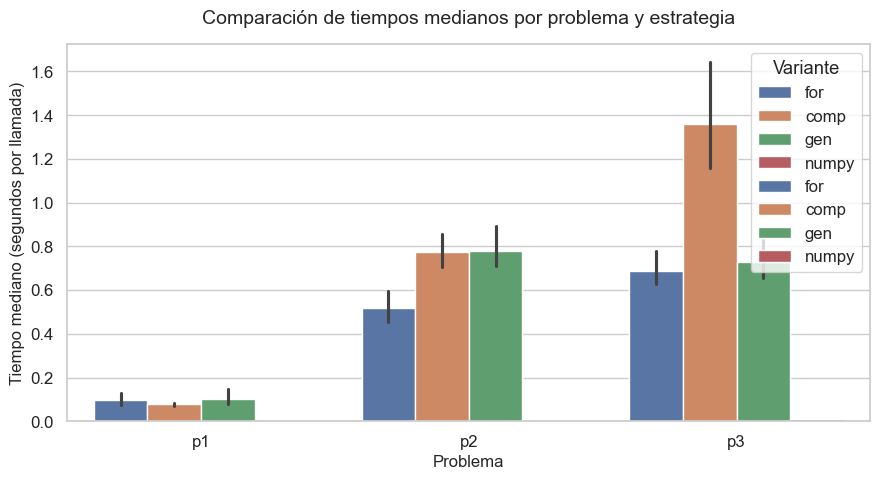

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Estilo visual
sns.set_theme(style="whitegrid", palette="deep", font_scale=1.1)

# --- Crear figura
plt.figure(figsize=(9, 5))

# --- Gráfico principal
sns.barplot(
    data=df,
    x="problema",
    y="tiempo_median",
    hue="variante",
    errorbar=None  # evita mostrar barras de error (pues ya tienes p10/p90)
)

# --- Barra de error
sns.barplot(
    data=df,
    x="problema",
    y="tiempo_median",
    hue="variante",
    errorbar=("pi", 80)  # percentil 10 y 90 como error bars
)

# --- Etiquetas y título
plt.title("Comparación de tiempos medianos por problema y estrategia", fontsize=14, pad=15)
plt.ylabel("Tiempo mediano (segundos por llamada)", fontsize=12)
plt.xlabel("Problema", fontsize=12)

# --- Leyenda y formato
plt.legend(title="Variante", loc="upper right", frameon=True)
plt.tight_layout()

# --- Mostrar
plt.show()

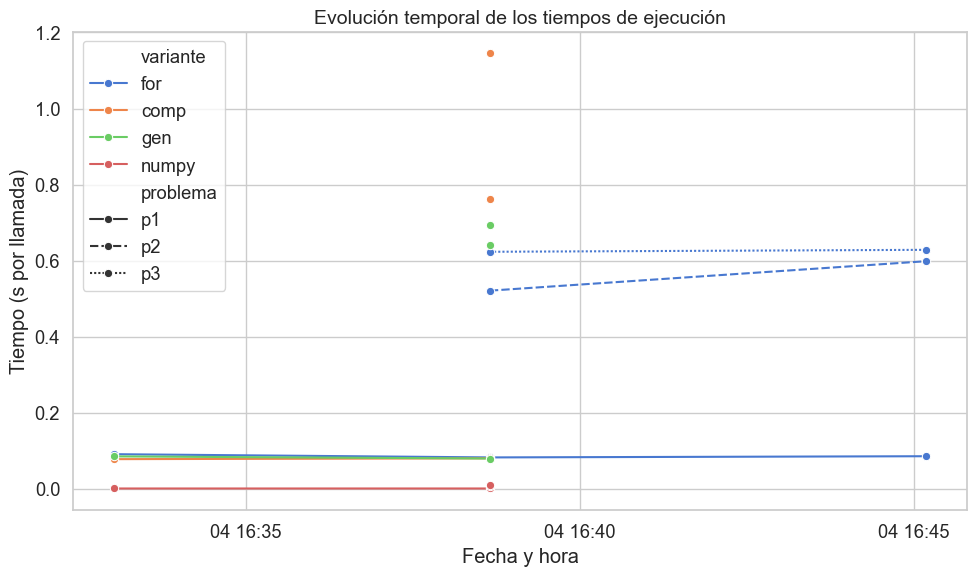

In [52]:
df["timestamp"] = pd.to_datetime(df["timestamp"])

plt.figure(figsize=(10,6))
sns.lineplot(data=df, x="timestamp", y="tiempo", hue="variante", style="problema", marker="o")

plt.title("Evolución temporal de los tiempos de ejecución", fontsize=14)
plt.ylabel("Tiempo (s por llamada)")
plt.xlabel("Fecha y hora")
plt.tight_layout()
plt.show()

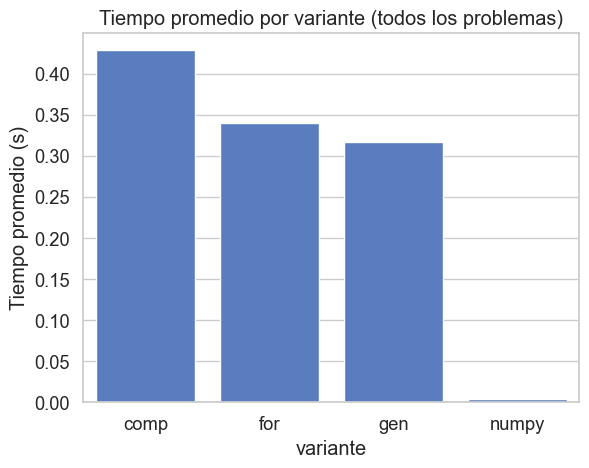

In [53]:
sns.barplot(
    data=df.groupby("variante", as_index=False)["tiempo"].mean(),
    x="variante", y="tiempo"
)
plt.title("Tiempo promedio por variante (todos los problemas)")
plt.ylabel("Tiempo promedio (s)")
plt.show()

In [ ]:
n = 100_000
number = 5
t1_for, t1_comp, t1_gen, t1_np = time_p1(n=n, number=number)
t2_for, t2_comp, t2_gen, t2_np = time_p2(n=n, number=number)
t3_for, t3_comp, t3_gen, t3_np = time_p3(n=n, number=number)


In [38]:
data = {
    "metadata": {
        "timestamp": datetime.datetime.now().isoformat(),
        "python_version": platform.python_version(),
        "numpy_version": np.__version__,
        "machine": platform.machine(),
        "params": {"n": n, "number": number}
    },
    "results": {
        "p1": {
            "for":   {"s_per_call_median": t1_for, "repetitions": number},
            "comp":  {"s_per_call_median": t1_comp, "repetitions": number},
            "gen":   {"s_per_call_median": t1_gen, "repetitions": number},
            "numpy": {"s_per_call_median": t1_np, "repetitions": number}
        },
        "p2": {
            "for":   {"s_per_call_median": t2_for, "repetitions": number},
            "comp":  {"s_per_call_median": t2_comp, "repetitions": number},
            "gen":   {"s_per_call_median": t2_gen, "repetitions": number},
            "numpy": {"s_per_call_median": t2_np, "repetitions": number}
        },
        "p3": {
            "for":   {"s_per_call_median": t3_for, "repetitions": number},
            "comp":  {"s_per_call_median": t3_comp, "repetitions": number},
            "gen":   {"s_per_call_median": t3_gen, "repetitions": number},
            "numpy": {"s_per_call_median": t3_np, "repetitions": number}
        }
    }
}

In [39]:
from pathlib import Path

Path("results/tiempos").mkdir(parents=True, exist_ok=True)
fecha = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
nombre_archivo = f"results/tiempos/tiempos_p123_n{n}_{fecha}.json"

In [40]:
with open(nombre_archivo, "w") as f:
    json.dump(data, f, indent=4)

print(f"✅ Resultados guardados en: {nombre_archivo}")

✅ Resultados guardados en: results/tiempos/tiempos_p123_n100000_2025-11-04_16-38-41.json


In [41]:
with open(nombre_archivo) as f:
    cargado = json.load(f)

print(json.dumps(cargado, indent=4))

{
    "metadata": {
        "timestamp": "2025-11-04T16:38:39.251386",
        "python_version": "3.11.4",
        "numpy_version": "2.2.0",
        "machine": "x86_64",
        "params": {
            "n": 100000,
            "number": 5
        }
    },
    "results": {
        "p1": {
            "for": {
                "s_per_call_median": 0.08216322000225773,
                "repetitions": 5
            },
            "comp": {
                "s_per_call_median": 0.07973855200179969,
                "repetitions": 5
            },
            "gen": {
                "s_per_call_median": 0.07924051200097892,
                "repetitions": 5
            },
            "numpy": {
                "s_per_call_median": 0.0004312069977459032,
                "repetitions": 5
            }
        },
        "p2": {
            "for": {
                "s_per_call_median": 0.5208901890000561,
                "repetitions": 5
            },
            "comp": {
                "s_per_c

## Guía de medición y reporte

- Usa `timeit.timeit` con el mismo `number` de repeticiones para todas las versiones.
- Antes de medir, ejecuta cada función una vez (warm‑up) si tu entorno lo requiere.
- Reporta tiempos en una tabla simple o tupla por problema: `(for, comp, gen, numpy)`.
- Interpreta resultados: ¿qué versión gana?, ¿por cuánto?, ¿cambia con `n`?
- Evita medir al mismo tiempo código que imprime o muestra gráficos.

Sugerencia: prueba varios tamaños `n` (por ejemplo: 10^4, 10^5, 10^6) y observa tendencias.


In [ ]:

{
  "metadata": {
    "timestamp": "2025-10-26T05:53:09Z",
    "python_version": "3.12.1",
    "numpy_version": "2.1.1",
    "machine": "x86_64",
    "params": {
      "p1": { "n": 200000, "number": 7 },
      "p2": { "n": 150000, "k": 5, "number": 6 },
      "p3": { "n": 200000, "umbral": 10.0, "number": 3 },
      "repeat_each": 5
    }
  },
  "results": {
    "p1": {
      "for":   { "s_per_call_median": 0.42, "repetitions": 7 },
      "comp":  { "s_per_call_median": 0.37, "repetitions": 7 },
      "gen":   { "s_per_call_median": 0.31, "repetitions": 7 },
      "numpy": { "s_per_call_median": 0.014, "repetitions": 7 }
    },
    "p2": {
      "for":   { "s_per_call_median": 0.83, "repetitions": 6 },
      "comp":  { "s_per_call_median": 1.28, "repetitions": 6 },
      "gen":   { "s_per_call_median": 1.37, "repetitions": 6 },
      "numpy": { "s_per_call_median": 0.014, "repetitions": 6 }
    },
    "p3": {
      "for":   { "s_per_call_median": 0.11, "repetitions": 3 },
      "comp":  { "s_per_call_median": 0.10, "repetitions": 3 },
      "gen":   { "s_per_call_median": 0.12, "repetitions": 3 },
      "numpy": { "s_per_call_median": 0.002, "repetitions": 3 }
    }
  }
}

{'metadata': {'timestamp': '2025-10-26T05:53:09Z',
  'python_version': '3.12.1',
  'numpy_version': '2.1.1',
  'machine': 'x86_64',
  'params': {'p1': {'n': 200000, 'number': 7},
   'p2': {'n': 150000, 'k': 5, 'number': 6},
   'p3': {'n': 200000, 'umbral': 10.0, 'number': 3},
   'repeat_each': 5}},
 'results': {'p1': {'for': {'s_per_call_median': 0.42, 'repetitions': 7},
   'comp': {'s_per_call_median': 0.37, 'repetitions': 7},
   'gen': {'s_per_call_median': 0.31, 'repetitions': 7},
   'numpy': {'s_per_call_median': 0.014, 'repetitions': 7}},
  'p2': {'for': {'s_per_call_median': 0.83, 'repetitions': 6},
   'comp': {'s_per_call_median': 1.28, 'repetitions': 6},
   'gen': {'s_per_call_median': 1.37, 'repetitions': 6},
   'numpy': {'s_per_call_median': 0.014, 'repetitions': 6}},
  'p3': {'for': {'s_per_call_median': 0.11, 'repetitions': 3},
   'comp': {'s_per_call_median': 0.1, 'repetitions': 3},
   'gen': {'s_per_call_median': 0.12, 'repetitions': 3},
   'numpy': {'s_per_call_median': 

Aquí tienes una versión mejorada —más clara, profesional y fluida— de tu descripción, manteniendo todo el contenido técnico pero con mejor redacción, estructura y tono didáctico:

---

## Guía de visualización con Seaborn y Matplotlib 

**Objetivo:**
Utilizar los tiempos almacenados en formato JSON para **visualizar y analizar el rendimiento de distintas estrategias**, aprendiendo por tu cuenta a usar **Seaborn** y **Matplotlib**.
Esta guía explica **qué graficar**, **cómo interpretar los resultados** y **qué investigar** en la documentación oficial. *(No se proporciona código.)*

---

### 1️⃣ Preparación conceptual de los datos (formato “largo” o *tidy data*)

Antes de graficar, imagina tu tabla en formato largo, ideal para Seaborn.
Cada fila debe representar una observación o una agregación (por ejemplo, la mediana por problema, estrategia y tamaño `n`).

**Columnas sugeridas:**
`problema` (p1/p2/p3), `estrategia` (for/comp/gen/numpy), `n`, `repeticion`,
`s_por_llamada` (o `ns_por_elemento`), `mediana`, `p25`, `p75`, `host`, `python_version`, `numpy_version`.

**Investiga:** cómo transformar datos a formato largo en Seaborn, y cómo asignar columnas a ejes, color (`hue`), y paneles (`facet`).

---

### 2️⃣ Gráfico de barras agrupadas (comparación por problema)

**Qué mostrar:**
Barras agrupadas por `estrategia` dentro de cada `problema`, donde la altura sea la mediana de `s_por_llamada`.
Añade **barras de error** (p25–p75 o intervalos de confianza) para reflejar la variabilidad.

**Interpretación esperada:**
Identifica la estrategia más rápida en cada problema y comenta las diferencias relativas
(p. ej. *“NumPy es aproximadamente 60× más rápido que el bucle for en P1”*).

**Variaciones:**
Si tienes varios tamaños `n`, crea paneles por `n` o por `problema`.

---

### 3️⃣ Boxplots o Violinplots (variabilidad y outliers)

**Qué mostrar:**
Para un `problema` y `n` fijos, representa la distribución de `s_por_llamada` por `estrategia` mediante boxplots o violinplots.

**Interpretación:**
Compara la dispersión entre estrategias, detecta outliers y analiza cuál es más estable o consistente.
**Sugerencia:** agrega los puntos individuales de las repeticiones (usa *swarmplot* o *stripplot* superpuestos).

---

### 4️⃣ Curvas de escalamiento (tiempo vs tamaño `n`)

**Qué mostrar:**
Gráfico de líneas con `x = n`, `y = s_por_llamada` (o `ns_por_elemento`), y una línea por `estrategia`.
Usa escala log–log si hay grandes diferencias de magnitud.

**Interpretación:**
Compara las pendientes para ver cómo crece el tiempo con `n`.
Detecta cruces donde una estrategia empieza a superar a otra según el tamaño.

**Sugerencia:**
Usa *facets* por `problema` para comparar patrones entre P1, P2 y P3.

---

### 5️⃣ Eficiencia por elemento (`ns_por_elemento`)

**Qué mostrar:**
Gráfico de dispersión o líneas de `ns_por_elemento` frente a `n`, diferenciando por `estrategia`.

**Interpretación:**
Busca trayectorias planas (eficiencia estable).
Comenta desviaciones que puedan indicar efectos de caché, memoria o *overhead*.

---

### 6️⃣ Heatmap de razones (comparación con NumPy)

**Qué mostrar:**
Matriz donde cada celda es la razón `tiempo_estrategia / tiempo_numpy`, organizada por `problema` y `n`.

**Interpretación:**
Colorea las celdas: >1 significa más lento que NumPy; <1, más rápido.
Permite ver de un vistazo cuánto más lenta es cada alternativa y si esa relación cambia con `n`.

---

### 7️⃣ ECDF o histogramas (robustez de medición)

**Qué mostrar:**
Para un `problema` y `n` determinados, traza la **ECDF** o un **histograma** de `s_por_llamada` por `estrategia`.

**Interpretación:**
Compara la probabilidad de obtener tiempos inferiores a un umbral.
Analiza el solapamiento entre estrategias y comenta su robustez.

---

### 8️⃣ Diseño y buenas prácticas de visualización

* **Ejes y unidades:** etiqueta claramente (segundos por llamada, nanosegundos por elemento). Usa escalas logarítmicas si hay diferencias grandes.
* **Títulos y leyendas:** incluye el `problema`, `n`, entorno y fecha si es relevante. Mantén leyendas claras.
* **Paletas:** usa siempre los mismos colores por `estrategia` (orden: for → comp → gen → numpy).
* **Barras de error:** representa p25–p75 o intervalos por *bootstrap*.
* **Anotaciones:** agrega etiquetas informativas (p. ej. “×60 más rápido”).
* **Exportación:** guarda en PNG o SVG con resolución suficiente (DPI alto).

---

### 9️⃣ Interpretación (qué incluir en el reporte)

Para cada figura, redacta **4–6 frases** que respondan:

* ¿Qué estrategia es más rápida y por cuánto? ¿Cambia con `n`?
* ¿Cuál muestra menor dispersión? ¿Existen *outliers*?
* ¿Qué patrones de escalamiento aparecen? ¿Se observan efectos de memoria o caché?
* ¿Qué recomendación práctica harías según el problema?

---

### 🔟 Pistas de investigación (sin código)

Explora en la documentación de Seaborn/Matplotlib cómo:

* Crear gráficos de barras con barras de error.
* Generar boxplots o violinplots con puntos superpuestos.
* Dibujar líneas múltiples (una por `estrategia`) y facetas por `problema`.
* Aplicar escalas logarítmicas y personalizar ejes, leyendas y estilos.
* Construir heatmaps con normalización de colores para ratios.

---

### ✅ Entregables mínimos

1. **Gráfico de barras agrupadas** por `problema` (con barras de error) y su interpretación.
2. **Boxplot o violinplot** por `problema` y `n` (uno representativo) con interpretación.
3. **Curva de escalamiento** (`y` vs `n`) con facetas por `problema` e interpretación.
4. **Heatmap de razones** respecto a NumPy e interpretación.

---

**Recordatorio:**
El objetivo no es reproducir un estilo exacto, sino **demostrar criterio al elegir la visualización adecuada**, **etiquetar correctamente** e **interpretar con rigor** los resultados.

---

¿Quieres que te prepare también una versión más resumida y visual (por ejemplo, como guía para estudiantes o plantilla de trabajo)? Podría incluir íconos, ejemplos de figuras y estructura de reporte.


In [27]:
sns.set_theme(style="whitegrid", font_scale=1.05)

# --- 0) Filtrar al último experimento
ultimo_ts = df["timestamp"].max()
dfl = df[df["timestamp"] == ultimo_ts].copy()

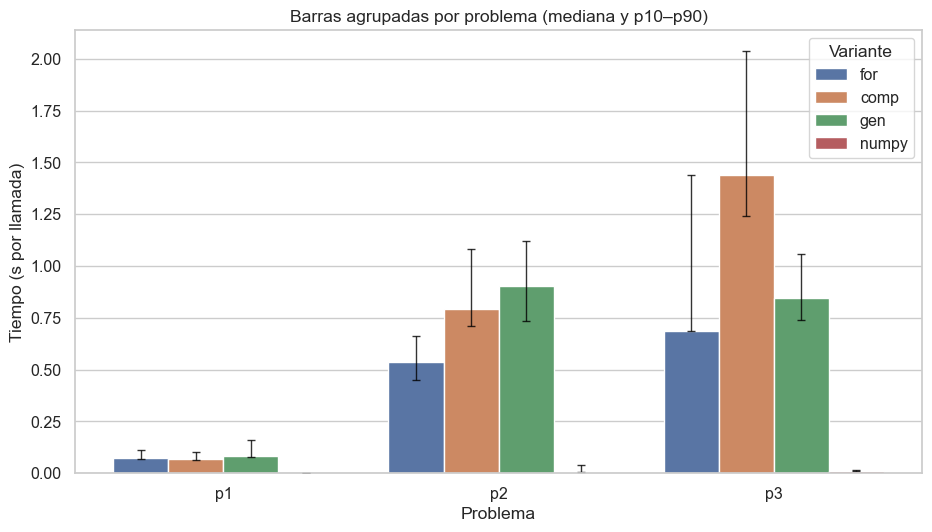

In [28]:
dfl_err = dfl.dropna(subset=["tiempo_median"])  # por si faltan p10/p90
dfl_err["yerr_low"]  = np.clip(dfl_err["tiempo_median"] - dfl_err.get("p10", dfl_err["tiempo_median"]), a_min=0, a_max=None)
dfl_err["yerr_high"] = np.clip(dfl_err.get("p90", dfl_err["tiempo_median"]) - dfl_err["tiempo_median"], a_min=0, a_max=None)

plt.figure(figsize=(9.5, 5.5))
ax = sns.barplot(
    data=dfl_err,
    x="problema", y="tiempo_median", hue="variante",
    errorbar=None
)
# Añadimos barras de error manual si hay p10/p90
if {"p10","p90"}.issubset(dfl.columns):
    # colocar errores sobre cada barra
    for c in ax.containers:
        for bar in c:
            x = bar.get_x() + bar.get_width()/2
            h = bar.get_height()
            # encontrar fila correspondiente
            # (match por x-position es complejo; usamos data y re-dibujamos con scatter+errorbar)
    # más simple: dibujar un errorbar por grupo directamente
    for (prob, var), g in dfl_err.groupby(["problema","variante"]):
        x = list(dfl_err["problema"].unique()).index(prob)
        # desplazamiento de hue
        hues = list(dfl_err["variante"].unique())
        hidx = hues.index(var)
        # ancho por defecto ~0.8; n_hues = len(hues)
        n_h = len(hues)
        x_pos = x - 0.4 + (hidx + 0.5) * (0.8 / n_h)
        plt.errorbar(
            x=x_pos,
            y=g["tiempo_median"].mean(),
            yerr=np.array([[g["yerr_low"].mean()], [g["yerr_high"].mean()]]),
            fmt="none", ecolor="black", elinewidth=1, capsize=3, capthick=1, alpha=0.8
        )

plt.title("Barras agrupadas por problema (mediana y p10–p90)")
plt.ylabel("Tiempo (s por llamada)")
plt.xlabel("Problema")
plt.legend(title="Variante")
plt.tight_layout()
plt.show()

/var/folders/02/f5t2_03x2tx9rnxbf2xxx5lr0000gn/T/ipykernel_2977/259868513.py:5: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.25`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(


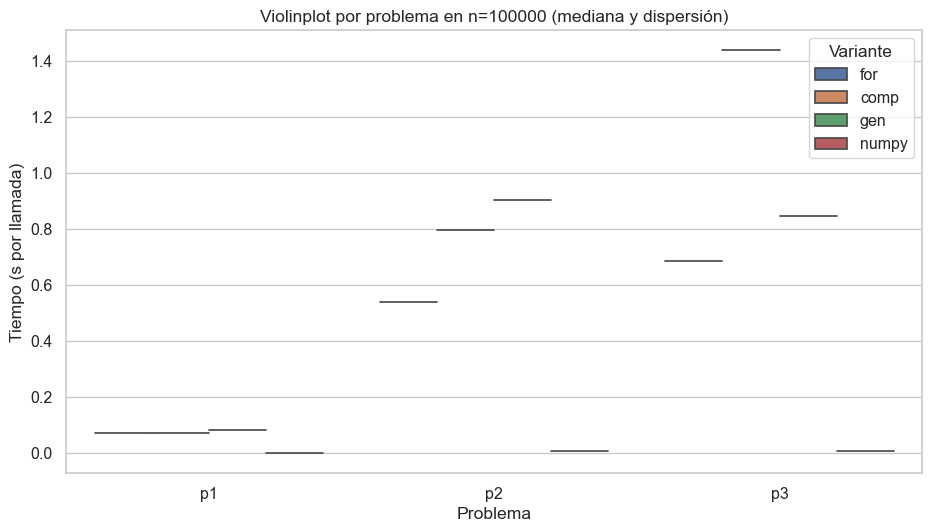

In [36]:
n_rep = dfl["n"].max()
dfr = dfl[dfl["n"] == n_rep].copy()

plt.figure(figsize=(9.5, 5.5))
sns.violinplot(
    data=dfr, x="problema", y="tiempo_median", hue="variante",
    inner="box", cut=0, bw=0.25
)
plt.title(f"Violinplot por problema en n={int(n_rep)} (mediana y dispersión)")
plt.ylabel("Tiempo (s por llamada)")
plt.xlabel("Problema")
plt.legend(title="Variante", loc="upper right")
plt.tight_layout()
plt.show()

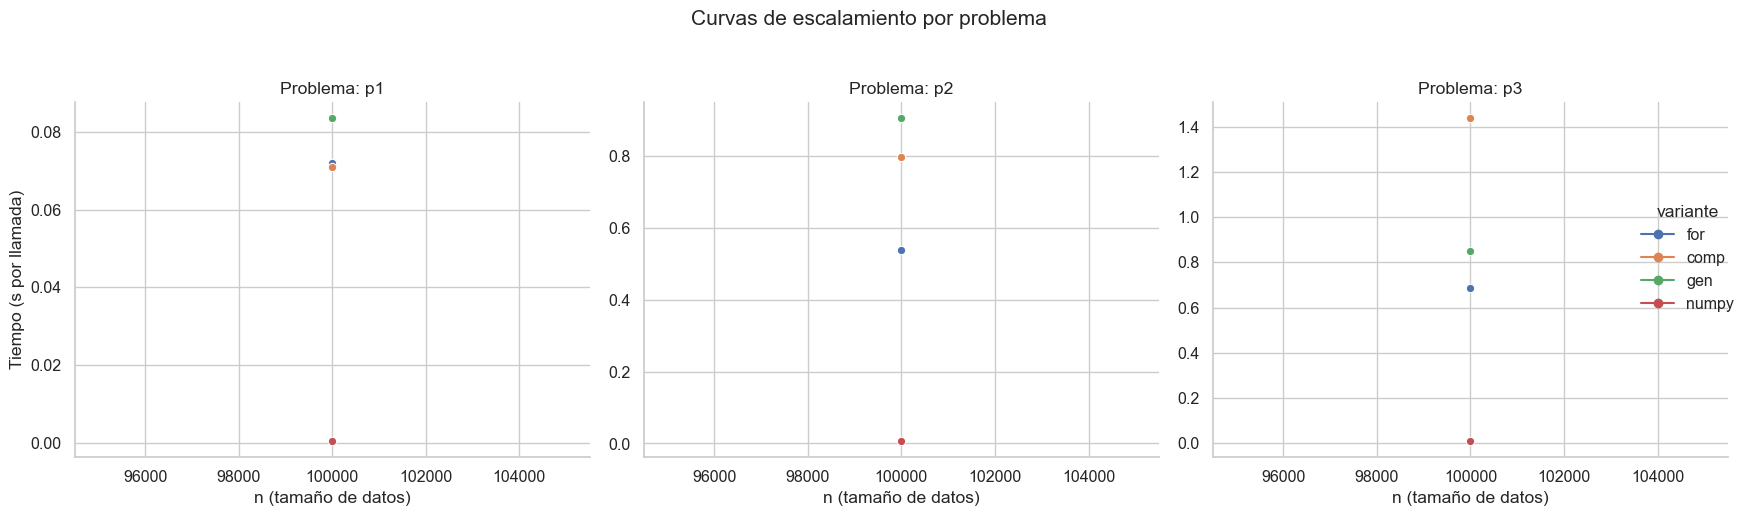

In [35]:

g = sns.relplot(
    data=dfl,
    x="n", y="tiempo_median", hue="variante",
    col="problema", kind="line", marker="o",
    facet_kws={"sharey": False}, height=5, aspect=1.1
)

g.set_axis_labels("n (tamaño de datos)", "Tiempo (s por llamada)")
g.set_titles("Problema: {col_name}")
plt.suptitle("Curvas de escalamiento por problema", y=1.03)
plt.tight_layout()
plt.show()

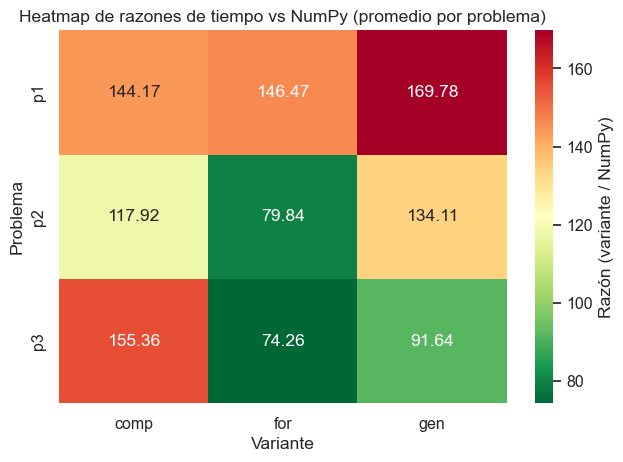

In [ ]:
base = dfl.pivot_table(index=["problema","n"], columns="variante", values="tiempo_median", aggfunc="first").reset_index()
if "numpy" in base.columns:
    for v in [c for c in base.columns if c not in ["problema","n","numpy"]]:
        base[v] = base[v] / base["numpy"]
    # Nos quedamos solo con las razones (excluye columna numpy)
    razones = base.melt(id_vars=["problema","n"], value_vars=[c for c in base.columns if c not in ["problema","n","numpy"]],
                        var_name="variante", value_name="razon_vs_numpy")
    # Heatmap index: problema, columns: variante, values: promedio en cada problema (si hay varios n)
    hm = razones.groupby(["problema","variante"], as_index=False)["razon_vs_numpy"].mean()
    tabla_hm = hm.pivot(index="problema", columns="variante", values="razon_vs_numpy")

    plt.figure(figsize=(6.5, 4.8))
    sns.heatmap(tabla_hm, annot=True, fmt=".2f", cmap="RdYlGn_r", cbar_kws={"label": "Razón (variante / NumPy)"})
    plt.title("Heatmap de razones de tiempo vs NumPy (promedio por problema)")
    plt.xlabel("Variante")
    plt.ylabel("Problema")
    plt.tight_layout()
    plt.show()
else:
    print("la variante 'numpy' para construir el heatmap de razones.")